# Actividad 03 Pokemon Dataset Analysis

## Estudiante:

- **Nombre:** Brandon Manuel Ventura Umaña.
- **Código:** ISNP664218.

## Detalles de la actividad:

Utilizando el set de datos de Pokemon que se encuentra alojado en la Universidad de Arizona, responder las siguientes preguntas sobre las variables categoricas utilizando Python:

- Cuantificar en porcentajes los diferentes Pokemon de Type 1.
- Cuantificar en porcentajes los diferentes Pokemon de Type 2.
- Cuantificar en porcentajes los tipos Legendary.
- Cruzar los datos Type 1 con Legendary en porcentajes.
- ¿Cuantos son los tipo Legendary de Type 2 Poison?

**Dataset:** https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.pie_chart_helper import plot_pie_chart as pie_chart

In [159]:
endpoint = "data/Pokemon.csv"  #"https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv" or data/Pokemon.csv
pokemon_df = pd.read_csv(endpoint)
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [160]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [161]:
# Clean NAs from Type 2 column to correctly apply aggregation functions on it, adding a nex class/category
pokemon_df.loc[:, ["Type 2"]] = pokemon_df["Type 2"].fillna(
    "NST"
)  # NST -> Not Second Type
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Cuantificar en porcentajes los diferentes Pokemon de Type 1.


In [162]:
types_analysis_df = pd.DataFrame()


types_analysis_df = (
    (
        pokemon_df.groupby("Type 1").agg(PercentageT1=("Type 1", "count"))
        / pokemon_df.shape[0]
        * 100
    )
    .sort_values("PercentageT1", ascending=False)
    .reset_index()
)
types_analysis_df

,Type 1,PercentageT1
0,Water,14.000
1,Normal,12.250
2,Grass,8.750
3,Bug,8.625
4,Psychic,7.125
5,Fire,6.500
6,Electric,5.500
7,Rock,5.500
8,Ghost,4.000
9,Ground,4.000


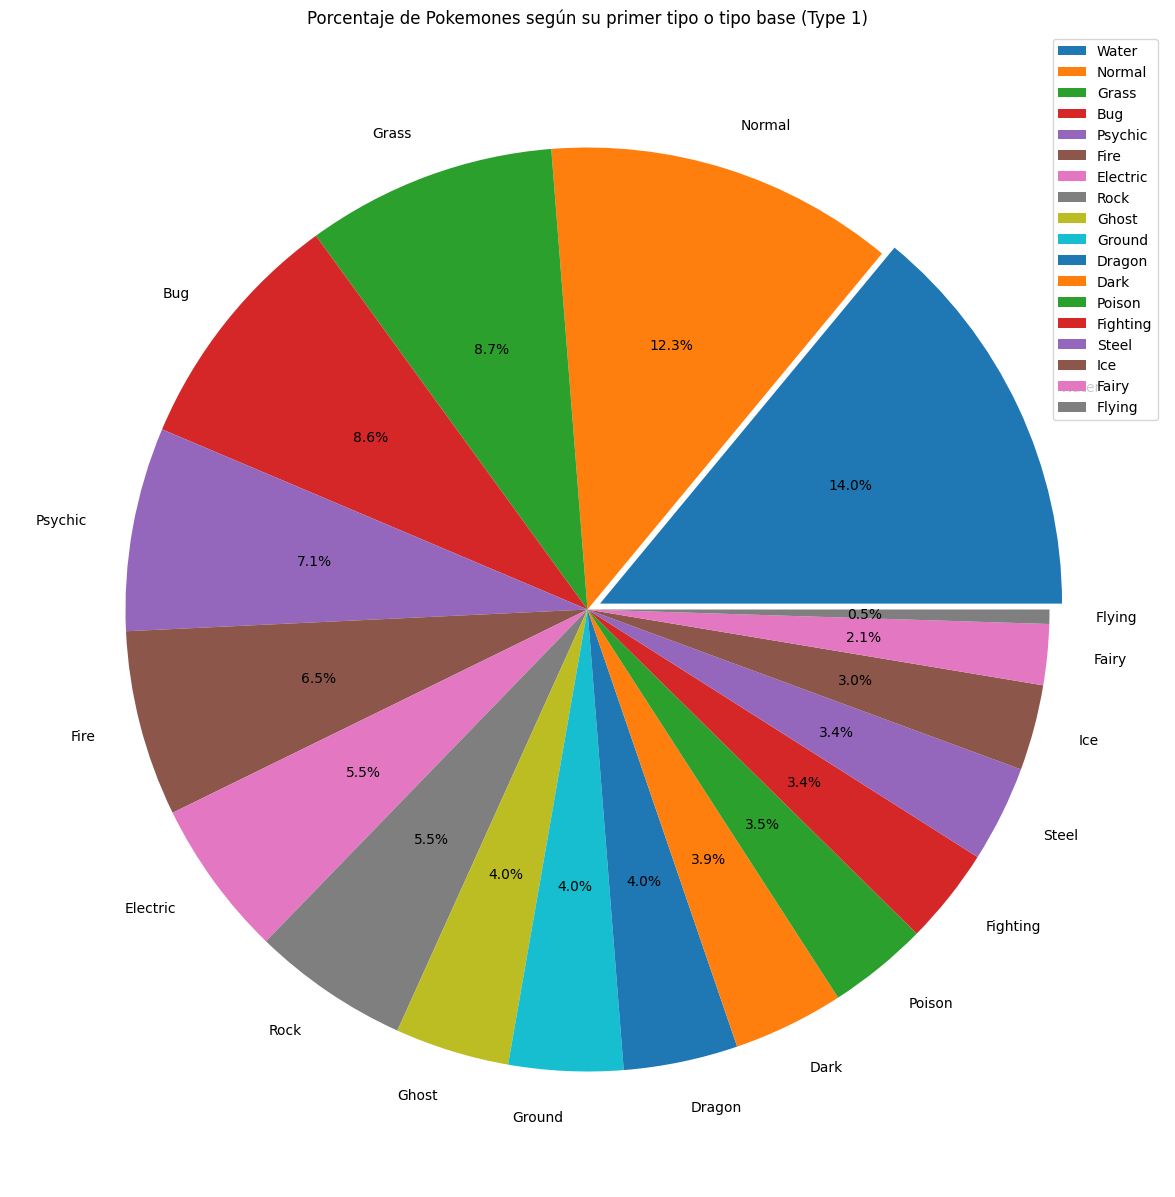

In [163]:
x = types_analysis_df["PercentageT1"]
labels = types_analysis_df["Type 1"]

pie_chart(
    x,
    labels,
    (15, 15),
    0.03,
    "Porcentaje de Pokemones según su primer tipo o tipo base (Type 1)",
)
plt.show()

### Cuantificar en porcentajes los diferentes Pokemon de Type 2.


In [164]:
# Shapes for Type 1 and Type 2 are incompatible
types_analysis_df.shape, (
    pokemon_df.groupby("Type 2").agg(PercentageT2=("Type 2", "count"))
    / pokemon_df.shape[0]
    * 100
).sort_values("PercentageT2", ascending=False).reset_index().shape

((18, 2), (19, 2))

In [165]:
# We must make compatible the shapes in order to do not lose the last row of information.
types_analysis_df.loc[types_analysis_df.shape[0]] = ["NST", 0]  # Add a new row to the Type 1
types_analysis_df.loc[:, ["Type 2", "PercentageT2"]] = (
    (
        pokemon_df.groupby("Type 2").agg(PercentageT2=("Type 2", "count"))
        / pokemon_df.shape[0]
        * 100
    )
    .sort_values("PercentageT2", ascending=False)
    .reset_index()
)
types_analysis_df

,Type 1,PercentageT1,Type 2,PercentageT2
0,Water,14.000,NST,48.250
1,Normal,12.250,Flying,12.125
2,Grass,8.750,Ground,4.375
3,Bug,8.625,Poison,4.250
4,Psychic,7.125,Psychic,4.125
5,Fire,6.500,Fighting,3.250
6,Electric,5.500,Grass,3.125
7,Rock,5.500,Fairy,2.875
8,Ghost,4.000,Steel,2.750
9,Ground,4.000,Dark,2.500


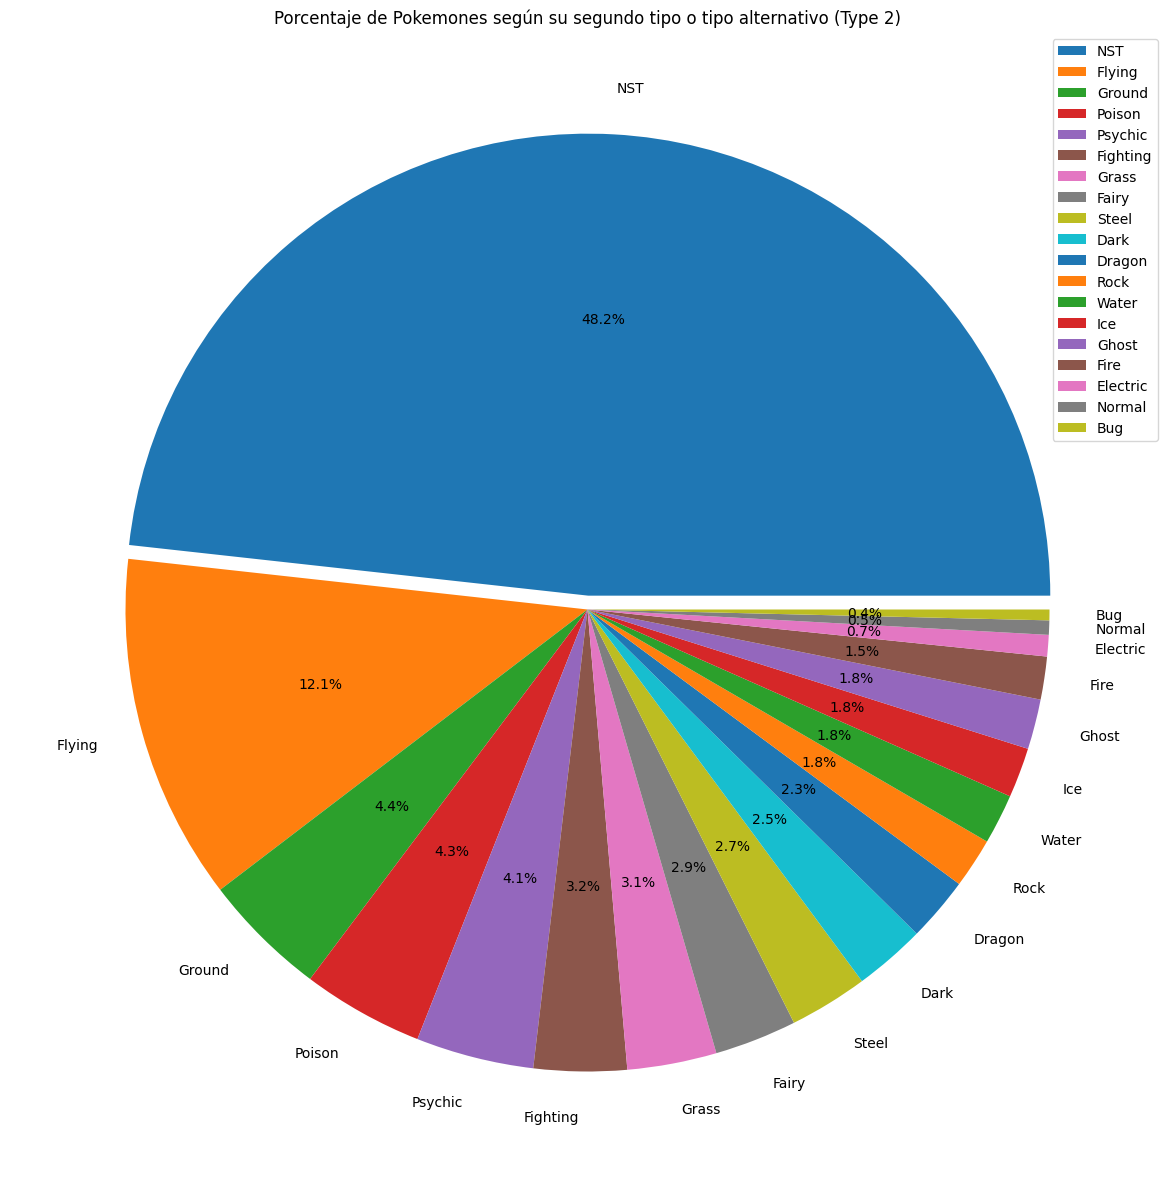

In [166]:
x = types_analysis_df["PercentageT2"]
labels = types_analysis_df["Type 2"]
pie_chart(
    x,
    labels,
    (15, 15),
    0.03,
    "Porcentaje de Pokemones según su segundo tipo o tipo alternativo (Type 2)",
)
plt.show()

### Cuantificar en porcentajes los tipos Legendary.

Los pokemones legendarios pueden cuantificarse de las dos formas siguientes:

- Pokemones legendarios por tipo.
- Pokemones legendarios y no legendarios.


#### Pokemones legendarios por tipo1.


In [167]:
legendary_pkms_df = pokemon_df[pokemon_df["Legendary"]][["Type 1", "Type 2"]]
type1_legendary_pkms_df = (
    legendary_pkms_df.groupby("Type 1")
    .agg(Qty=("Type 1", "count"))
    .sort_values("Qty")
    .reset_index()
    .rename(columns={"Type 1": "LegendaryType"})
)

type2_legendary_pkms_df = (
    legendary_pkms_df.groupby("Type 2")
    .agg(Qty=("Type 2", "count"))
    .sort_values("Qty")
    .reset_index()
    .rename(columns={"Type 2": "LegendaryType"})
    .query("LegendaryType != 'NST'")
)

total_count = (
    pd.concat([type1_legendary_pkms_df, type2_legendary_pkms_df])
    .groupby("LegendaryType")
    .agg(Qty=("Qty", "sum"))
    .sort_values("Qty")
    .reset_index()
)
total_count["Percentage"] = total_count["Qty"] / total_count["Qty"].sum() * 100
total_count

,LegendaryType,Qty,Percentage
0,Normal,2,1.904762
1,Dark,3,2.857143
2,Fairy,3,2.857143
3,Ghost,3,2.857143
4,Grass,3,2.857143
5,Fighting,4,3.809524
6,Rock,4,3.809524
7,Electric,5,4.761905
8,Ground,5,4.761905
9,Ice,5,4.761905


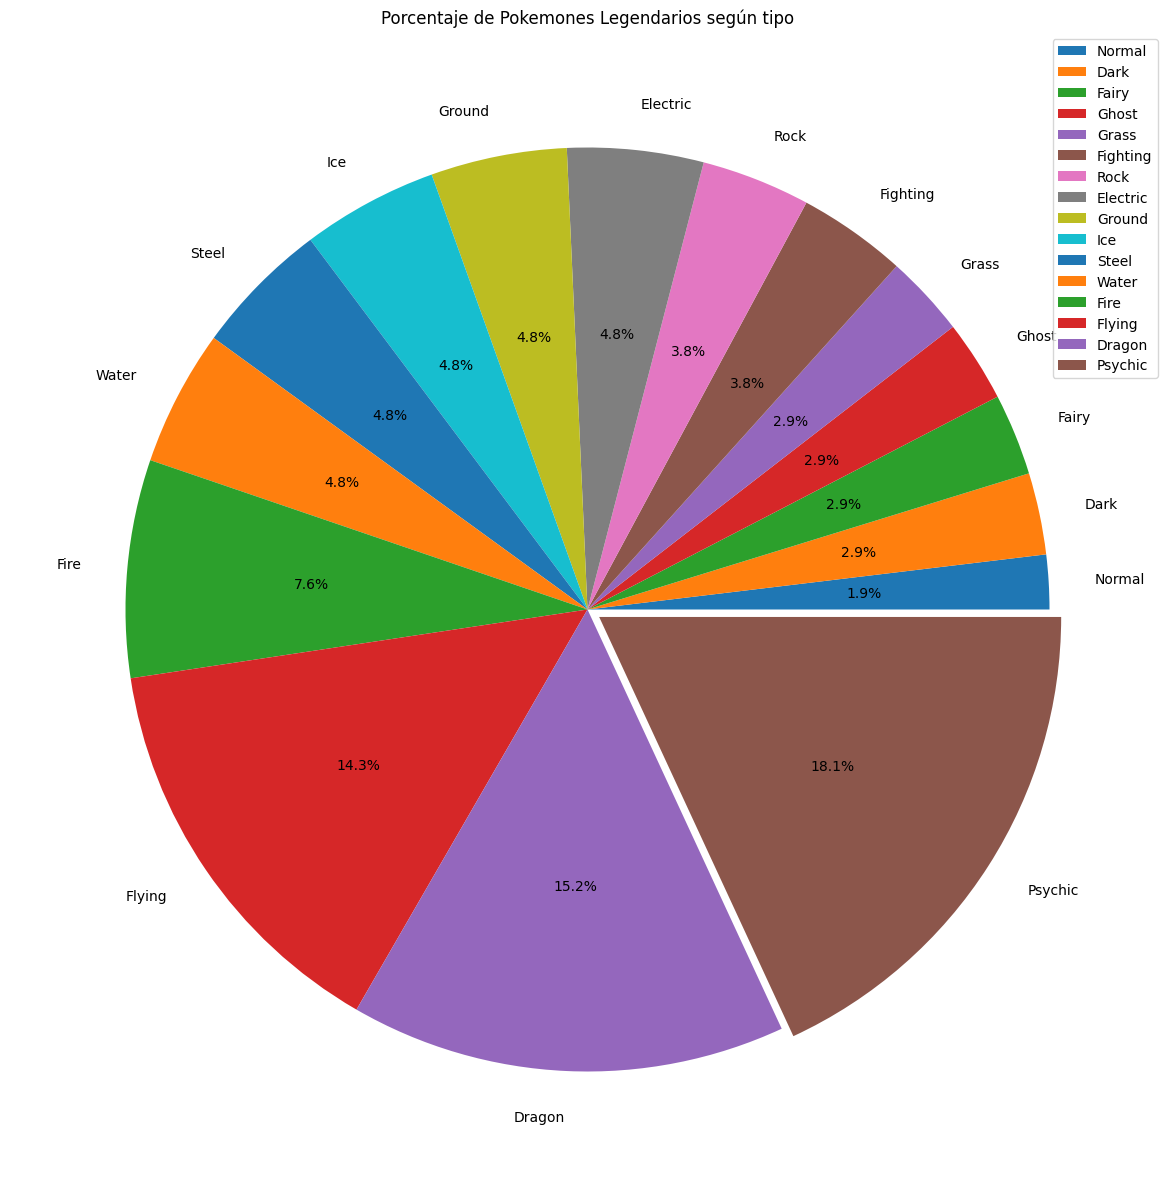

In [168]:
x = total_count["Percentage"]
labels = total_count["LegendaryType"]
pie_chart(x, labels, (15,15), 0.03, "Porcentaje de Pokemones Legendarios según tipo")
plt.show()

#### Pokemones legendarios y no legendarios.


In [169]:
legendary_count, non_legendary_count, total_count = (
    pokemon_df[pokemon_df["Legendary"]].shape[0],
    pokemon_df[pokemon_df["Legendary"] == False].shape[0],
    pokemon_df.shape[0],
)
legendary_comparison_df = pd.DataFrame(
    {
        "Qty": [legendary_count, non_legendary_count],
        "Percentage": [
            legendary_count / total_count * 100,
            non_legendary_count / total_count * 100,
        ],
    },
    index=["Legendaries", "NonLegendaries"],
)
legendary_comparison_df

,Qty,Percentage
Legendaries,65,8.125
NonLegendaries,735,91.875


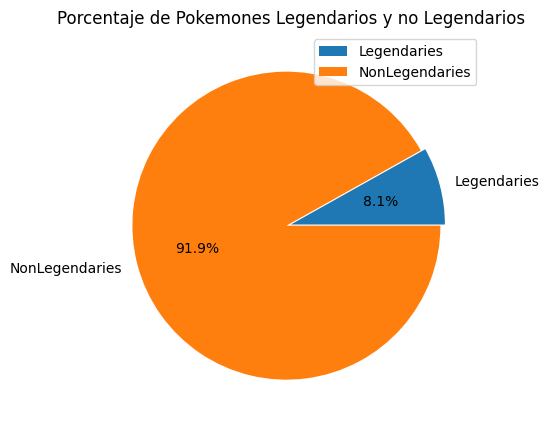

In [170]:
x = legendary_comparison_df["Percentage"]
labels = legendary_comparison_df.index
pie_chart(x, labels, (5,5), 0.03, "Porcentaje de Pokemones Legendarios y no Legendarios")
plt.show()

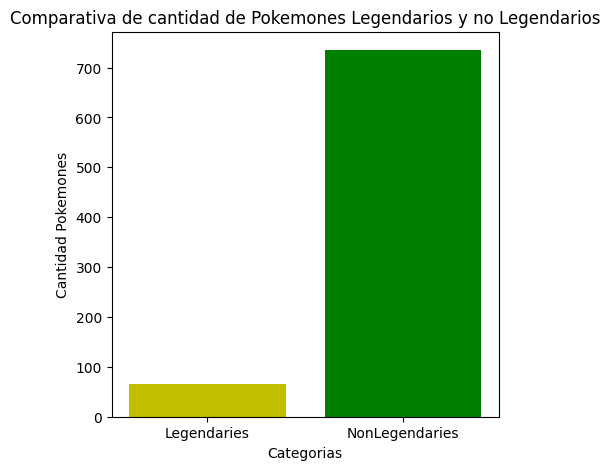

In [171]:
x = legendary_comparison_df.index
y = legendary_comparison_df["Qty"]

plt.figure(figsize=(5, 5))
plt.bar(x, y, color=["y", "g"])
plt.title("Comparativa de cantidad de Pokemones Legendarios y no Legendarios")
plt.xlabel("Categorias")
plt.ylabel("Cantidad Pokemones")
plt.show()

### Cruzar los datos Type 1 con Legendary en porcentajes.


In [172]:
pd.crosstab(index=pokemon_df["Type 1"], columns=pokemon_df["Legendary"])


Legendary,False,True
Type 1,,
Bug,69,0
Dark,29,2
Dragon,20,12
Electric,40,4
Fairy,16,1
Fighting,27,0
Fire,47,5
Flying,2,2
Ghost,30,2


In [173]:
pd.crosstab(index=pokemon_df["Type 1"], columns=pokemon_df["Legendary"]).apply(
    lambda row: row / pokemon_df.shape[0] * 100
)

Legendary,False,True
Type 1,,
Bug,8.625,0.000
Dark,3.625,0.250
Dragon,2.500,1.500
Electric,5.000,0.500
Fairy,2.000,0.125
Fighting,3.375,0.000
Fire,5.875,0.625
Flying,0.250,0.250
Ghost,3.750,0.250


In [174]:
# Percentage based on the total per Type 1 (By row)
pd.crosstab(index=pokemon_df["Type 1"], columns=pokemon_df["Legendary"], normalize='index') * 100

Legendary,False,True
Type 1,,
Bug,100.000000,0.000000
Dark,93.548387,6.451613
Dragon,62.500000,37.500000
Electric,90.909091,9.090909
Fairy,94.117647,5.882353
Fighting,100.000000,0.000000
Fire,90.384615,9.615385
Flying,50.000000,50.000000
Ghost,93.750000,6.250000


In [175]:
# Percentage based on the total per Legendary(By column)
pd.crosstab(index=pokemon_df["Type 1"], columns=pokemon_df["Legendary"], normalize='columns') * 100

Legendary,False,True
Type 1,,
Bug,9.387755,0.000000
Dark,3.945578,3.076923
Dragon,2.721088,18.461538
Electric,5.442177,6.153846
Fairy,2.176871,1.538462
Fighting,3.673469,0.000000
Fire,6.394558,7.692308
Flying,0.272109,3.076923
Ghost,4.081633,3.076923


In [176]:
# Percentage based on the total Pokemon count.
pd.crosstab(index=pokemon_df["Type 1"], columns=pokemon_df["Legendary"], normalize='all') * 100

Legendary,False,True
Type 1,,
Bug,8.625,0.000
Dark,3.625,0.250
Dragon,2.500,1.500
Electric,5.000,0.500
Fairy,2.000,0.125
Fighting,3.375,0.000
Fire,5.875,0.625
Flying,0.250,0.250
Ghost,3.750,0.250


In [177]:
# Percentage based on the total Pokemon count.
contingency_legendaries_type1_df = pd.crosstab(
    index=pokemon_df["Type 1"],
    columns=pokemon_df["Legendary"].map(
        lambda col: "Legendary" if col else "Non Legendary"
    ),
).apply(lambda row: row / pokemon_df.shape[0] * 100)
contingency_legendaries_type1_df

Legendary,Legendary,Non Legendary
Type 1,,
Bug,0.000,8.625
Dark,0.250,3.625
Dragon,1.500,2.500
Electric,0.500,5.000
Fairy,0.125,2.000
Fighting,0.000,3.375
Fire,0.625,5.875
Flying,0.250,0.250
Ghost,0.250,3.750


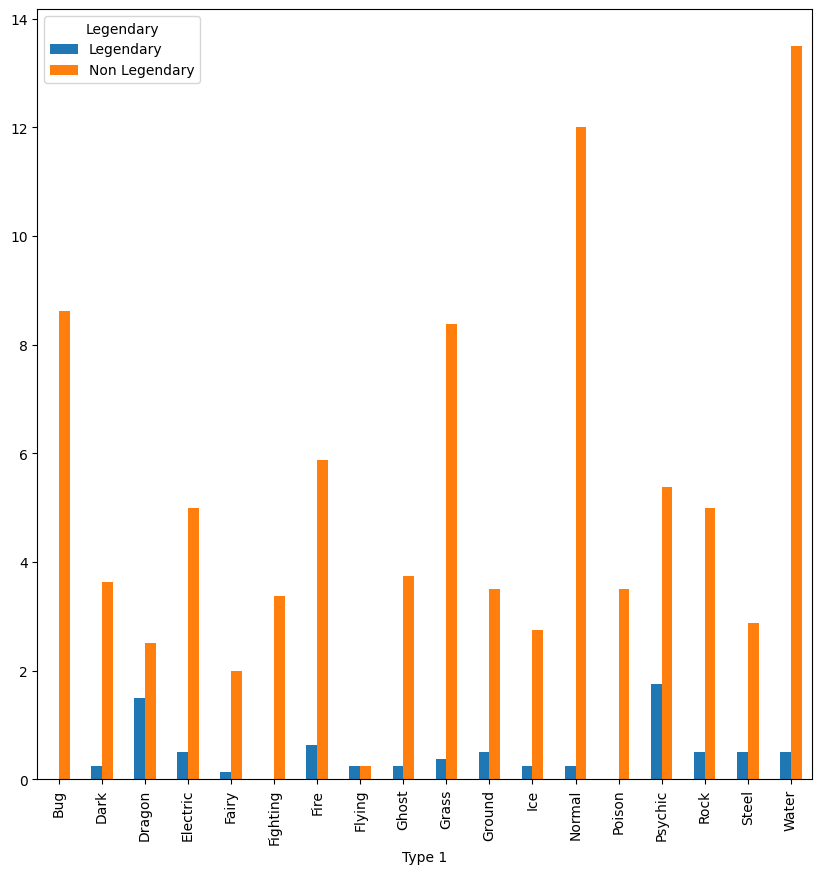

In [178]:
contingency_legendaries_type1_df.plot(kind="bar", figsize=(10,10))
plt.show()

### ¿Cuantos son los tipo Legendary de Type 2 Poison?


Utilizando el DataFrame de Pokemones original.

In [179]:
poison_legendary_count = pokemon_df[(pokemon_df["Legendary"]) & (pokemon_df["Type 2"] == "Poison")].shape[0]
print(f"Cantidad de Pokemones legendarios con subtipo (Type 2) Veneno (Poison): {poison_legendary_count}")
pokemon_df[(pokemon_df["Legendary"]) & (pokemon_df["Type 2"] == "Poison")]

Cantidad de Pokemones legendarios con subtipo (Type 2) Veneno (Poison): 0


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


Utilizando el DataFrame de Tipos para Pokemones Legendarios.

In [180]:
poison_legendary_count = legendary_pkms_df[legendary_pkms_df["Type 2"] == "Poison"].shape[0]
print(f"Cantidad de Pokemones legendarios con subtipo (Type 2) Veneno (Poison): {poison_legendary_count}")
legendary_pkms_df[legendary_pkms_df["Type 2"] == "Poison"]

Cantidad de Pokemones legendarios con subtipo (Type 2) Veneno (Poison): 0


,Type 1,Type 2


Observando los datos para identificar Pokemones donde el subtipo (Type 2) es Veneno (Poison) y la condición de legendario (Legendary).

In [181]:
pokemon_df[pokemon_df["Type 2"] == "Poison"][["Type 2", "Legendary"]]

,Type 2,Legendary
0,Poison,False
1,Poison,False
2,Poison,False
3,Poison,False
16,Poison,False
17,Poison,False
18,Poison,False
19,Poison,False
48,Poison,False
49,Poison,False


##### Fin